In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import math
import json
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MFCCs')

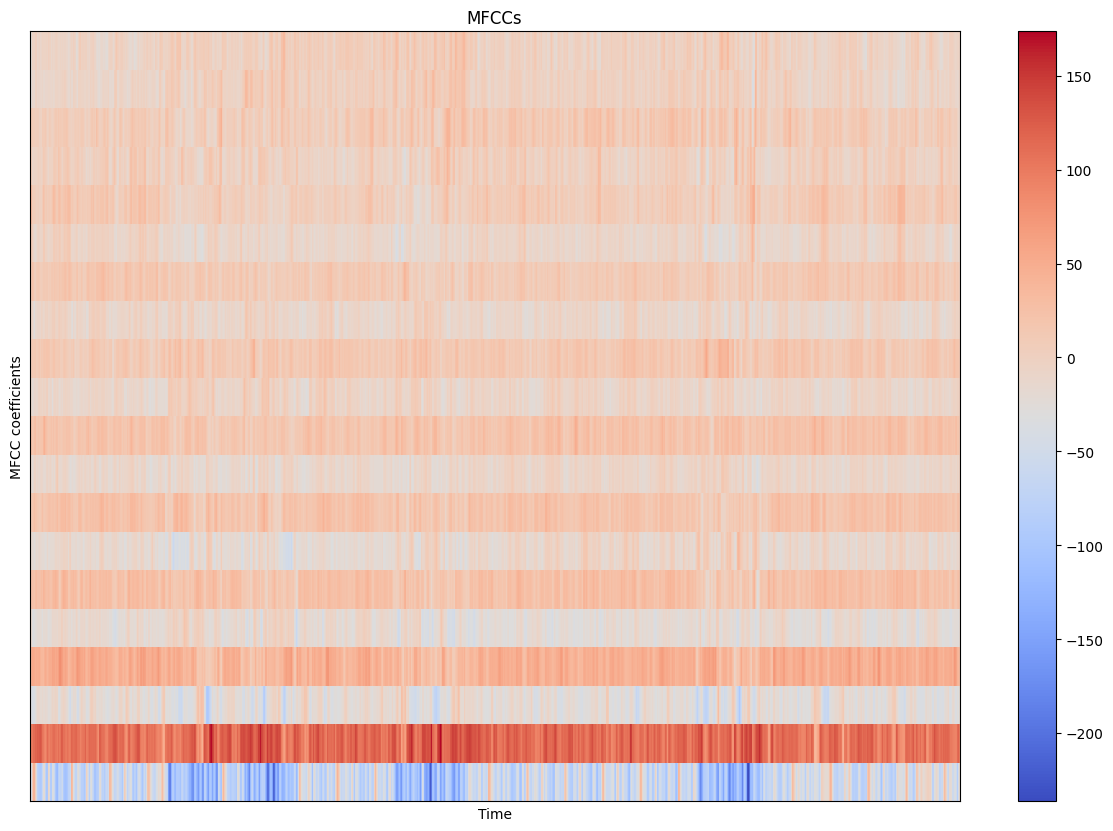

In [ ]:
FIG_SIZE = (15,10)

file = '/content/drive/MyDrive/GTZAN/genres_original/hiphop/hiphop.00012.wav'

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

MFCCs = librosa.feature.mfcc(y=signal)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/GTZAN/genres_original'
JSON_PATH = '/content/drive/MyDrive/DL NLP Data/data2.json'

SAMPLE_RATE = 22050 # sample rate that will be used for AnalogToDigital conversion of signals
TRACK_DURATION = 30 # the duration of each track
SAMPLES_PER_TRACK = TRACK_DURATION * SAMPLE_RATE # the number of samples we will be taking for each track

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc = 23, n_fft = 1024, hop_length = 512, num_segments = 5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """
    data={
        'mappings': [], # mappings will contain the name of the genres
        'labels': [], # will have the corresponding index of the genres of the corresponding mfccs
        'mfcc': [] # the mfccs of the signals
     }

    # number of samples in a segment
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    # the expected number of mfccs vectors from a segment
    mfcc_per_segment = math.ceil(samples_per_segment / hop_length)

    corrupted_files = []

    #traversing through the various directories
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if(dirpath is not dataset_path): # ensuring that we are inside a genre subfolder
            genre_label = dirpath.split('\\')[-1]
            data['mappings'].append(genre_label)
            print(f'Processing: {genre_label}')
            for f in filenames: # traversing through files of a genre subfolder
                try:
                    file_path = os.path.join(dirpath, f)

                    #loading the audio file as a digital signal using librosa
                    signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                    # signal: ndarray, sr: sampling rate

                    # dividing the audio into segments
                    for d in range(num_segments):
                        start = samples_per_segment * d # starting index of a segment
                        end = samples_per_segment * (d + 1) # ending index of a segment
                        #extracting mfcc of a segment using librosa
                        mfcc = librosa.feature.mfcc(y = signal[start:end], sr = sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T # taking the transpose of mfcc

                        if(len(mfcc) == mfcc_per_segment):
                            data['mfcc'].append(mfcc.tolist())
                            data['labels'].append(i - 1)
                            print(f'{file_path}, segment: {d + 1}')
                except:
                    corrupted_files.append(f)

    print('\n')
    print(f'{len(corrupted_files)} corrupted files found:')
    for i in corrupted_files:
        print(i)
    print('The End')

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4) # dumping the data into JSON file

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 10) # calling the save_mfcc function

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/GTZAN/genres_original/country/country.00001.wav, segment: 7
/content/drive/MyDrive/GTZAN/genres_original/country/country.00001.wav, segment: 8
/content/drive/MyDrive/GTZAN/genres_original/country/country.00001.wav, segment: 9
/content/drive/MyDrive/GTZAN/genres_original/country/country.00001.wav, segment: 10
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 1
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 2
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 3
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 4
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 5
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 6
/content/drive/MyDrive/GTZAN/genres_original/country/country.00000.wav, segment: 7
/content/drive/MyDrive/GTZAN/genres